PROJETO 3 - CIÊNCIA DOS DADOS

Grupo: Gabriel Moura, Felipe Aron e Guilherme Aliperti


Projeto de regressão linear utilizando base de dados dos jogadores do FIFA. Pretendemos encontrar o coeficiente de determinação, simbolizado por r^2, que indica quanto da variação total é comum aos elementos que constituem os pares analisados. Analisaremos o coeficiente de determinação entre o overall (número que representa a qualidade do jogador) com suas outras características. Pretendemos tambem encontrar a combinação de 3 atributos do jogador(aceleração, long shot...) que retorne o maior R^2 em relação ao overall. 

In [2]:
import math
import os.path
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
from random import shuffle
from scipy.stats import linregress
import statsmodels.api as sm

C:\Users\guial\Documents\guizika\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#Transforma os valores em float e sem os caracteres invalidos
#Aqui estamos somente ajustando o dataframe para conseguirmos iniciar a analise...
df_completo = pd.read_excel("dados_completo.xls")
lista_final_valor = []
lista_final_sal = []

    #Ajustando os Valores dos jogadores para float...
for valores in df_completo["Value"]:
    valores = str(valores)
    l = valores.split("¬")
    del l[0]
    for x in l:
        carac = x.split("M")
        if len(carac) == 2:
            vf = float(carac[0]) * 1000000
            lista_final_valor.append(vf)
        else:
            carac = x.split("K")
            vf = float(carac[0]) * 1000
            lista_final_valor.append(vf)
            
# Ajustando os salários dos jogadores para float...          
for valores in df_completo["Wage"]:
    valores = str(valores)
    l = valores.split("¬")
    del l[0]
    for x in l:
        carac = x.split("M")
        if len(carac) == 2:
            vf = float(carac[0]) * 1000000
            lista_final_sal.append(vf)
        else:
            carac = x.split("K")
            vf = float(carac[0]) * 1000
            lista_final_sal.append(vf)
            
# Cria o Novo Dataframe ajustado...
df_valor_idade = pd.DataFrame({"Valor": lista_final_valor, "Overall": df_completo.Overall, "Idade": df_completo.Age,"Salário": lista_final_sal, "Potencial":df_completo.Potential})


CURIOSIDADE : O jogador que mais tem potencial de evoluir no fifa 18 a partir de um overall pré-determinado...

In [4]:
lp = []
lo = []
ln = []
z = 0
for valores in df_completo["Overall"]:
    if valores > 60:
        lo.append(valores)
    else:
        lo.append(0)


for valores in df_completo["Potential"]:
    if lo[z] > 60:
        lp.append(valores)
    z = z + 1
    
    
for valores in df_completo["Name"]:
    ln.append(valores)

x = 0

lr = []
while x < len(lp):
    resultado = lp[x] - lo[x]
    lr.append(resultado)
    x = x + 1
    

print("O jogador que mais tem potencial de evoluir do FIFA 18 é: {0}".format(ln[(lr.index(max(lr)))]))
    

O jogador que mais tem potencial de evoluir do FIFA 18 é: A. Gomes


Vamos analisar o coeficiente de determinação do valor em relação ao seu Overall por dois métodos diferentes:

In [5]:
# R2 do Overall em relação ao Valor

def lin_regression(x, y):
    m, b, R, p, SEm = linregress(x, y)

    n = len(x)
    SSx = np.var(x, ddof=1) * (n-1)  
    SEb2 = SEm **2 * (SSx/n + np.mean(x)**2)
    SEb = SEb2**0.5

    return m, b, SEm, SEb, R, p

m, b, Sm, Sb, R, p = lin_regression(df_completo.Overall,lista_final_valor)

print('m = {:>.4g} +- {:6.4f}'.format(m, Sm))
print('b = {:>.4g} +- {:6.4f}\n'.format(b, Sb))

print('R2 = {:7.5f}'.format(R**2))
print('p of test F : {:<8.6f}'.format(p))



m = 4.796e+05 +- 4455.9289
b = -2.939e+07 +- 296833.9156

R2 = 0.39188
p of test F : 0.000000


In [6]:
df_valor_idade.describe()

,Idade,Overall,Potencial,Salário,Valor
count,17981.000000,17981.000000,17981.000000,17981.000000,1.798100e+04
mean,25.144541,66.247984,71.190813,11546.966242,2.385390e+06
std,4.614272,6.987965,6.102199,23080.000139,5.353970e+06
min,16.000000,46.000000,46.000000,0.000000,0.000000e+00
25%,21.000000,62.000000,67.000000,2000.000000,3.000000e+05
50%,25.000000,66.000000,71.000000,4000.000000,6.750000e+05
75%,28.000000,71.000000,75.000000,12000.000000,2.100000e+06
max,47.000000,94.000000,94.000000,565000.000000,1.230000e+08


O resultado da regressão feita abaixo nos possibilita afirmar que quase 40% do overall do jogador pode ser "explicado" exclusivamente pelo seu Valor de mercado.

In [7]:
# R2 do Overall em relação ao Valor
Y = df_valor_idade.Overall
X = df_valor_idade.Valor
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()
results.rsquared


0.39187667210821131

Vamos agora avaliar o coeficiente entre o valor e a idade do jogador:

In [8]:
# R2 da Idade em relação ao Valor
Y = df_valor_idade.Overall
X = df_valor_idade.Idade
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()
results.rsquared

0.21138378108878031

O salário de um jogador geralmente tem muita relação com o seu valor no mercado no mundo real (sem contar os outliers, que seriam os altíssimos salários pagados por clubes chinenes e árabes), portanto é de se imaginar que o coeficiente de determinação entre o salário e o valor de um jogador é relativamente alto, portanto vamos analisar a inflûencia do salário de cada jogador no valor dele:

In [27]:
# R2 do Salário em relação ao Valor
Y = df_valor_idade.Valor
X = df_valor_idade.Salário
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()
results.rsquared


0.72336759331866829

Como esperado o coeficiente de determinação da análise acima é bem alto. O gráfico de scatter abaixo ajuda a vizualizar a relação.

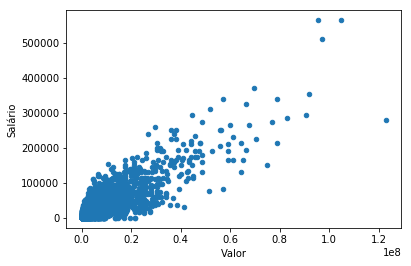

In [25]:
df_valor_idade.plot.scatter("Valor",'Salário')
plt.show()

Vamos agora analisar o coeficiente de determinação de tres carcterísticas juntas (o salário, o potencial e o overall) em relação ao seu valor:

In [18]:
# R2 do Overall,Potencial e Salário juntos em relação ao Valor
Y = df_valor_idade.Overall
X = df_valor_idade.loc[:, ("Valor", "Potencial","Salário")]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()
results.rsquared

0.55377643900851981

In [11]:
#Lista Atributos dos jogadores, limpando dados perdidos na tabela...
lista_atributos = list(df_completo)
del lista_atributos[0:12]
del lista_atributos[34:62]

Por conta de valores listados como soma na tabela de dados do excell tivemos que concerta-la com o código abaixo.

In [28]:
# RSquared Dicionário
rsquared = {}

#Ajustando Somas e Subtrações no Excel
for atributo in lista_atributos:
    lista = []
    for numeros in df_completo[atributo]:
        n = eval(str(numeros))
        lista.append(n)  
# R2 de cada Atributo                
    df_completo[atributo] = lista
    Y = df_valor_idade.Overall
    X = df_completo[atributo]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    results.summary()
    rsquared[atributo] = results.rsquared

SyntaxError: invalid token (<string>, line 1)

In [13]:
print("O atributo com maior R-Squared é: {0}".format(max(rsquared, key=rsquared.get)))
del rsquared[max(rsquared, key=rsquared.get)]
print("O segundo atributo com maior R-Squared é: {0}".format(max(rsquared, key=rsquared.get)))
del rsquared[max(rsquared, key=rsquared.get)]
print("O terceiro atributo com maior R-Squared é: {0}".format(max(rsquared, key=rsquared.get)))
del rsquared[max(rsquared, key=rsquared.get)]
print("O quarto atributo com maior R-Squared é: {0}".format(max(rsquared, key=rsquared.get)))
del rsquared[max(rsquared, key=rsquared.get)]
print("O quinto atributo com maior R-Squared é: {0}".format(max(rsquared, key=rsquared.get)))


O atributo com maior R-Squared é: Acceleration


ValueError: max() arg is an empty sequence

In [16]:
#Função de regressao linear de 3 variaveis
def atributos(a,b,c):
    Y = df_valor_idade.Overall
    X = df_completo.loc[:, (str(a),str(b),str(c))]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    return results.rsquared







In [17]:
import itertools
#Utilizando todas as possiveis combinações de 3 atributos(dentro do total de 34 atributos) conseguimos encontrar a 
#combinação com  maior R^2 
g = list(itertools.combinations(lista_atributos,3))

dicfinal = {}

for x in g:
    dicfinal[x[0]+" "+ x[1]+" "+x[2]] = atributos(x[0],x[1],x[2])

print("A combinação com maior R-Squared é: {0}".format(max(dicfinal, key=dicfinal.get)))

    

        

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Frente aos resultados obtidos podemos concluir que a combinação de 3 atributos mais significantes em relação ao overall do jogador e o seu valor são: